In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
df=pd.read_csv('salaray_data_eda.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,excel_yn,spark_yn,ml_yn,sql_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,1,0,1,0,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,1,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,1,1,1,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,1,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,1,0,1,1,data scientist,na,2748,3


## Plans
- choose relevant columns
- get dummy variables
- train test split
- Multiple linear regression
- Lasso regression
- Random forest
- Tune models using GridsearchCV
- test ensembles
 

### choose relevant columns

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [76]:
df_model=df[['avg_salary','Rating', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','num_comp',
       'hourly', 'employer_provided', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len']]

### get dummy variables

This affects the categorical variables. One new column gets created for each category. <br>
Example:<br>
If one column has five category, 5 new columns/variables will be created from this one column.


In [77]:
df_dum=pd.get_dummies(df_model)

In [78]:
# print(df_dum.to_string())
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,excel_yn,spark_yn,...,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,job_simp_vp,seniority_junior,seniority_lead,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,1,0,...,1,0,0,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,1,...,1,0,0,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,1,0,...,1,0,0,0,0,0,0,0,1,0


In [79]:
print(df_dum.columns.to_list())

['avg_salary', 'Rating', 'num_comp', 'hourly', 'employer_provided', 'same_state', 'age', 'python_yn', 'excel_yn', 'spark_yn', 'ml_yn', 'sql_yn', 'desc_len', 'Size_-1', 'Size_1 to 50 employees', 'Size_10000+ employees', 'Size_1001 to 5000 employees', 'Size_201 to 500 employees', 'Size_5001 to 10000 employees', 'Size_501 to 1000 employees', 'Size_51 to 200 employees', 'Size_Unknown', 'Type of ownership_-1', 'Type of ownership_College / University', 'Type of ownership_Company - Private', 'Type of ownership_Company - Public', 'Type of ownership_Government', 'Type of ownership_Hospital', 'Type of ownership_Nonprofit Organization', 'Type of ownership_Other Organization', 'Type of ownership_School / School District', 'Type of ownership_Subsidiary or Business Segment', 'Type of ownership_Unknown', 'Industry_-1', 'Industry_Accounting', 'Industry_Advertising & Marketing', 'Industry_Aerospace & Defense', 'Industry_Architectural & Engineering Services', 'Industry_Auctions & Galleries', 'Industry_B

### train test split


In [35]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,excel_yn,spark_yn,...,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,job_simp_vp,seniority_junior,seniority_lead,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,1,0,...,1,0,0,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,1,...,1,0,0,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,1,0,...,1,0,0,0,0,0,0,0,1,0


In [36]:
df_dum.drop('avg_salary',axis=1).head()

,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,excel_yn,spark_yn,ml_yn,...,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,job_simp_vp,seniority_junior,seniority_lead,seniority_na,seniority_senior
0,3.8,0,0,0,0,47,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1,3.4,0,0,0,0,36,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,4.8,0,0,0,1,10,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0
3,3.8,3,0,0,1,55,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,2.9,3,0,0,1,22,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [38]:
# df_dum['avg_salary']      #series
df_dum['avg_salary'].values  #array

array([ 72. ,  87.5,  85. ,  76.5, 114.5,  95. ,  73.5, 114. ,  61. ,
       140. , 163.5,  85. , 139. ,  65.5, 113.5, 146. , 102. , 153.5,
       142.5,  87.5, 105.5,  96. , 112.5,  84. , 143. ,  86.5,  99.5,
        47.5,  84. ,  85. ,  76.5,  96. , 114.5, 121. , 112.5, 106. ,
       107. , 110. , 147.5, 106. ,  88. ,  98.5, 142.5,  82.5, 130. ,
       155. , 184.5,  29.5,  86.5,  81. ,  91. , 114.5,  68. , 115. ,
       109.5,  75.5, 154.5, 143.5,  73.5,  95. , 107. , 115. , 139.5,
        67. ,  85. , 118. ,  79.5,  56.5, 128.5,  97.5,  66.5, 179.5,
        76. , 112. ,  98. , 128. , 150.5,  87.5, 110. , 113.5, 124. ,
        56.5, 130. ,  77.5,  87. ,  53.5, 139. , 114. ,  85.5,  48. ,
        48. , 174. ,  85. , 106.5,  72.5,  85.5,  97.5,  99. ,  56.5,
       133. , 121. ,  85.5,  87.5, 237.5,  95.5, 104.5,  56.5,  55. ,
        61.5, 157. ,  78. , 113.5, 140. , 132.5, 108. ,  80.5, 107.5,
        95. , 119.5, 134. , 100.5, 107.5, 122. ,  92.5,  62. ,  39.5,
       107.5,  40.5,

In [80]:
X=df_dum.drop('avg_salary',axis=1)   #independent variables
y=df_dum['avg_salary'].values      #dependent variables


### Multiple linear regression


#### using Statsmodel

Link: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

Linear models with independently and identically distributed errors, and for errors with heteroscedasticity or autocorrelation. This module allows estimation by **ordinary least squares** (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.

In [90]:
import statsmodels.api as sm

X_sm= X = sm.add_constant(X)

mod = sm.OLS(y, X_sm )   #sm.OLS(dependent, independent)
results = mod.fit()



In [91]:
results.params

const                47.156520
Rating                4.641330
num_comp              1.356405
hourly              -24.326381
employer_provided    34.918996
                       ...    
job_simp_vp          70.203218
seniority_junior    -12.952994
seniority_lead       37.182203
seniority_na          0.020848
seniority_senior     22.906464
Length: 181, dtype: float64

In [92]:
results.tvalues
# results.pvalues

const                7.677045
Rating               2.438052
num_comp             1.575536
hourly              -2.707131
employer_provided    3.082495
                       ...   
job_simp_vp          3.494377
seniority_junior    -2.817946
seniority_lead       7.695468
seniority_na         0.008847
seniority_senior     8.404310
Length: 181, dtype: float64

In [93]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     9.541
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.35e-89
Time:                        16:37:30   Log-Likelihood:                -3297.2
No. Observations:                 742   AIC:                             6886.
Df Residuals:                     596   BIC:                             7559.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Significant (pvalue < 0.10 (10%))**
- Rating
- hourly
- employer_provided
- python_yn
- job_simp
- Industry
- Sector
- state
- sql_yn
- ml_yn
- Type of ownership
- Size


#### Using Scikit Learn

Link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [97]:
print(cross_val_score(lm, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 ))
print(np.mean(cross_val_score(lm, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 )))

[-20.90167584 -19.83153229 -20.61868405]
-20.450630724804626


In [56]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

### Lasso regression


In [98]:
lm_l=Lasso()

In [99]:
print(cross_val_score(lm_l, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 ))
print(np.mean(cross_val_score(lm_l, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 )))

[-21.59714508 -21.72127184 -21.16158019]
-21.49333236661212


In [101]:
#getting different values for alpha

alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 )))

C:\Users\progoti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.9859945022763, tolerance: 56.02663189873419
  model = cd_fast.enet_coordinate_descent(
C:\Users\progoti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.336526878527366, tolerance: 53.60339368686869
  model = cd_fast.enet_coordinate_descent(


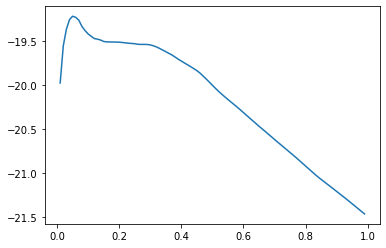

In [102]:
plt.plot(alpha,error)

In [109]:
#Finding optimum alpha
err=tuple(zip(alpha,error))
err[:5]

((0.01, -19.979325534854127),
 (0.02, -19.558841813110423),
 (0.03, -19.369395346784742),
 (0.04, -19.260031163798583),
 (0.05, -19.22126688150701))

In [110]:
df_err=pd.DataFrame(err,columns=['alpha','error'])

In [114]:
df_err.sort_values('error',ascending=False)

,alpha,error
4,0.05,-19.221267
5,0.06,-19.233437
3,0.04,-19.260031
6,0.07,-19.266196
7,0.08,-19.335957
...,...,...
94,0.95,-21.350390
95,0.96,-21.379364
96,0.97,-21.408332
97,0.98,-21.437325


In [122]:
df_err[df_err.error==max(df_err.error)]

,alpha,error
4,0.05,-19.221267


So, error is minimum when alpha=0.05

In [137]:
#creating model with optimum alpha
lm_l=Lasso(alpha=0.05)
lm_l.fit(X_train, y_train)

Lasso(alpha=0.05)

### Random forest

Random forest model should work better here because there are a lot of 0 and 1

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

In [124]:
print(cross_val_score(rf, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 ))
print(np.mean(cross_val_score(rf, X_train, y_train,scoring='neg_mean_absolute_error',cv=3 )))

[-15.29800505 -15.80421717 -14.58322335]
-15.185730229537336


### Tune models using GridsearchCV


In [127]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters, scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [129]:
gs.best_score_

-14.769519456645796

In [131]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=180)

### test ensembles

In [135]:
tpred_lm=lm.predict(X_test)   #predicting for linear regression

In [138]:
tpred_lml=lm_l.predict(X_test)  #predicting for lasso regression (optimum alpha)

In [144]:
tpred_rf=gs.best_estimator_.predict(X_test) #predicting for random forest regression (best estimators)

In [146]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

18.556617283944487
18.735991783107707
10.560943325876211


In [150]:
#combining multiple models

print(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

13.4857975333622


#### Conclusion

- Random forest model works better
- If you have 3 models, taking top 2 models to get average is a good idea. This generalizes better